# Data Analysis

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# Load data
data = pd.read_csv('../Data/non_nan_data.csv')

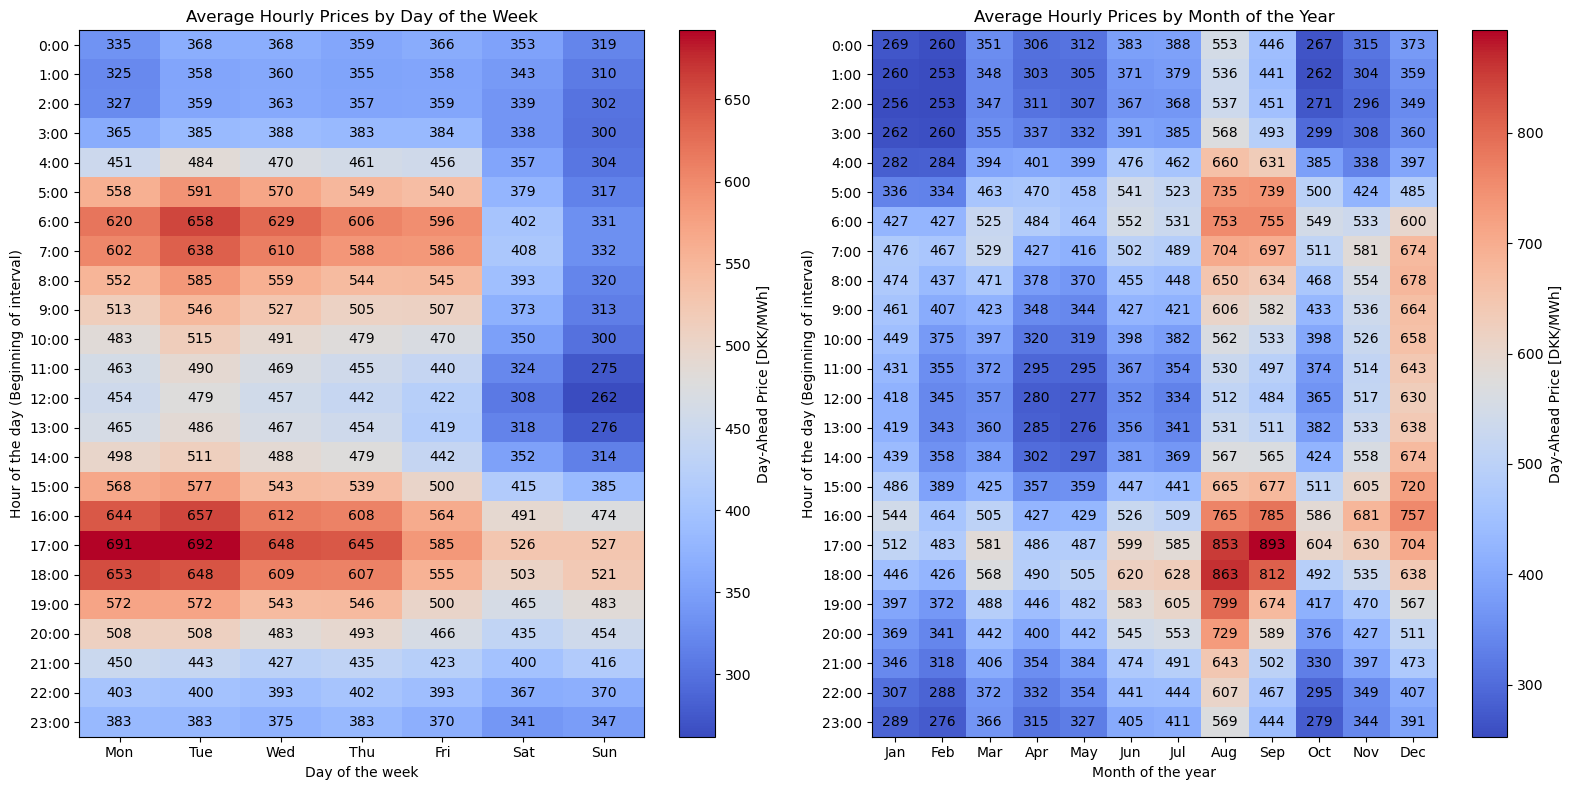

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert the DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract the hour of the day, day of the week, and month of the year
data['hour'] = data['DATE'].dt.hour
data['day_of_week'] = data['DATE'].dt.dayofweek  # Monday=0, Sunday=6
data['month'] = data['DATE'].dt.month

# Calculate the average spot price for DK2 by day of the week and hour
dk2_avg_day = data.groupby(['hour', 'day_of_week'])['DK2_spot'].mean().unstack()

# Calculate the average spot price for DK2 by month and hour
dk2_avg_month = data.groupby(['hour', 'month'])['DK2_spot'].mean().unstack()

# Create the plot with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot the heatmap for DK2 (hour of the day vs. day of the week)
cax1 = ax[0].imshow(dk2_avg_day, cmap='coolwarm', aspect='auto', interpolation='nearest')
ax[0].set_title('Average Hourly Prices by Day of the Week')
ax[0].set_ylabel('Hour of the day (Beginning of interval)')
ax[0].set_xlabel('Day of the week')
ax[0].set_xticks(np.arange(7))  # Days of the week
ax[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax[0].set_yticks(np.arange(24))  # Hours of the day
ax[0].set_yticklabels([f'{i}:00' for i in range(24)])

# Annotate the heatmap for DK2 (day of the week)
for i in range(24):
    for j in range(7):
        ax[0].text(j, i, f'{dk2_avg_day.iloc[i, j]:,.0f}', ha='center', va='center', color='black')

# Plot the heatmap for DK2 (hour of the day vs. month of the year)
cax2 = ax[1].imshow(dk2_avg_month, cmap='coolwarm', aspect='auto', interpolation='nearest')
ax[1].set_title('Average Hourly Prices by Month of the Year')
ax[1].set_ylabel('Hour of the day (Beginning of interval)')
ax[1].set_xlabel('Month of the year')
ax[1].set_xticks(np.arange(12))  # Months of the year
ax[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[1].set_yticks(np.arange(24))  # Hours of the day
ax[1].set_yticklabels([f'{i}:00' for i in range(24)])

# Annotate the heatmap for DK2 (month of the year)
for i in range(24):
    for j in range(12):
        ax[1].text(j, i, f'{dk2_avg_month.iloc[i, j]:,.0f}', ha='center', va='center', color='black')

# Add colorbars
fig.colorbar(cax1, ax=ax[0], orientation='vertical', label='Day-Ahead Price [DKK/MWh]')
fig.colorbar(cax2, ax=ax[1], orientation='vertical', label='Day-Ahead Price [DKK/MWh]')

# Show the plot
plt.tight_layout()
plt.show()
